# Data Analysis

In this notebook we will analyse the data from https://github.com/taivop/joke-dataset/blob/master/wocka.json.

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [19]:
# Wocka
with open('data/wocka.json', 'r') as f:
    data_wocka = json.load(f)

print('Attributes of the wocka file:\n', data_wocka[0].keys())

#stupidstuff
with open('data/stupidstuff.json', 'r') as f:
    data_stupid = json.load(f)

print('Attributes of the stupidstuff file:\n', data_stupid[0].keys())

Attributes of the wocka file:
 dict_keys(['body', 'category', 'id', 'title'])
Attributes of the stupidstuff file:
 dict_keys(['body', 'category', 'id', 'rating'])


The three atributes that interests us are:<br>
   - `body`: joke
   - `category`: category of the joke
   - `id`: Id of the joke
   
Let's create a dataframe that contains each attribute for all jokes

In [20]:
def create_dataframe(data_wocka, data_stupid):
    ''' Create a dataframe that separates the attributes for each joke
    Args:
        -data_wocka: loaded 'wocka.json' file
    Returns:
        -df: dataframe that contains 3 attributes: 'Id', 'body', 'category' for each joke
    '''
        
    #create lists that contain the bodies, categories, Ids
    Ids = []
    bodies = []
    categories = []
    
    #For each element of the data, we add the corresponding attributes to the previous lists
    for i in range(len(data_wocka)):
        joke = data_wocka[i] #query the i-st joke
        Ids.append(joke['id'])
        bodies.append(joke['body'])
        categories.append(joke['category'])
        
    #For each element of the data, we add the corresponding attributes to the previous lists
    for i in range(len(data_stupid)):
        joke = data_stupid[i] #query the i-st joke
        Ids.append(joke['id'])
        bodies.append(joke['body'])
        categories.append(joke['category'])
        
    #create the dataframe
    df = pd.DataFrame(list(zip(Ids, bodies, categories)), columns=['id', 'body', 'category'])
    
    return df


#create the dataframe and print the first 5 elements
df = create_dataframe(data_wocka, data_stupid)
df.head() 

,id,body,category
0,1,What do you call a cow with no legs?\r\n\r\nGr...,Animal
1,2,What do you call a cow jumping over a barbed w...,Animal
2,4,What's black and white and red all over?\r\n\r...,Other / Misc
3,5,"So, this guy walks into a bar.\r\n\r\nAnd says...",Bar
4,6,"If the opposite of pro is con, isn't the oppos...",One Liners


We add to this function the loading lines and create a new function `load_data` in `utils.py`

In [21]:
#we print 10 random lines
df.sample(10)

,id,body,category
10253,235,A 60 year old woman came home one day and hear...,Men
13164,3146,,Computers
7130,13543,Two priests died at the same time and met Sain...,Puns
6808,12938,You are stuck in a room with absolutely no doo...,Puns
3015,4865,How many roaches does it take to screw in a li...,Other / Misc
10118,100,Two blondes went to the market. While they wer...,Blonde Jokes
8453,15702,Two businessmen were taking a break while sett...,At Work
3530,6126,TO: ALL PERSONNEL\r\nFROM: ACCOUNTING \r\n\r\n...,At Work
3850,6902,You know you are addicted to coffee if ...\r\n...,Men / Women
7572,14370,Help....\r\nThe Titanic is going to sink. Ever...,Blond


In [22]:
#print number of NaN values contained in the dataframe
df.isnull().sum()

id          0
body        0
category    0
dtype: int64

## Data Visualisation

In this section we will seek the following questions:

1. What are the different categories ? How many jokes there are for each category ?
2. What is the average length of jokes per category ?


We begin by trying to answer the first question

In [23]:
#We answer the first question
print('The categories are:\n', df['category'].unique())

The categories are:
 ['Animal' 'Other / Misc' 'Bar' 'One Liners' 'Puns' 'Lawyer' 'Sports'
 'Medical' 'News / Politics' 'Men / Women' 'Gross' 'Blond' 'Yo Momma'
 'Redneck' 'Religious' 'At Work' 'College' 'Lightbulb' 'Children'
 'Insults' 'Knock-Knock' 'Tech' 'Yo Mama' 'Blonde' 'Blonde Jokes'
 'Military' 'Office Jokes' 'Aviation' 'Political' 'Deep Thoughts' 'Men'
 'Crazy Jokes' 'Food Jokes' 'Bar Jokes' 'Science' 'Police Jokes'
 'Miscellaneous' 'Sex' 'Idiots' 'Business' 'Women' 'Money' 'School'
 'Family, Parents' 'Heaven and Hell' 'Farmers' 'Love & Romance'
 'Blind Jokes' 'Marriage' 'Old Age' 'Animals' 'Holidays' 'Ethnic Jokes'
 'State Jokes' 'English' 'Computers' 'Lawyers' 'Light Bulbs' 'Music']


We see that there is similar categories such as:

- 'Yo Momma' and 'Yo Mama'
- 'Blonde' and 'Blond'

This is likely due to a typing error, we will arange this in the Data Cleaning section. For now, we will let them untouched, and plot the number of jokes per category in the data.


In [24]:
df.groupby('category').count().reset_index()

,category,id,body
0,Animal,656,656
1,Animals,131,131
2,At Work,288,288
3,Aviation,35,35
4,Bar,154,154
5,Bar Jokes,87,87
6,Blind Jokes,11,11
7,Blond,598,598
8,Blonde,1,1
9,Blonde Jokes,111,111


Text(0.5, 1.0, 'Number of jokes per category')

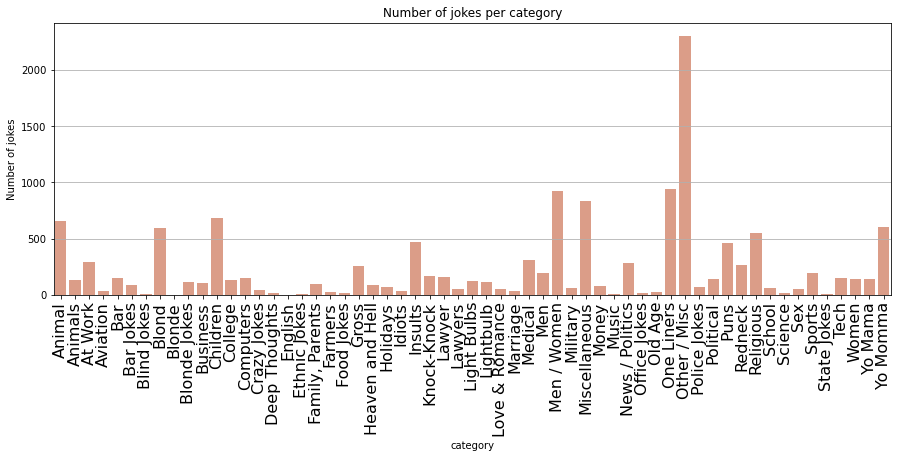

In [25]:
count_per_category = df.groupby('category').count().reset_index()

fig = plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='category', y='id', data=count_per_category, color='darksalmon')
plt.xticks(fontsize=16, rotation=90)
plt.ylabel('Number of jokes')
plt.title('Number of jokes per category')

We observe that for most categories, there are less than 500 jokes in the data. There is far more examples of 'Other/Misc' jokes than others, this may impact our results.

We again observe that the 'Blonde' and 'Yo Mama' categories are typing error, this will be corrected in the next section.

Now we try to answer the second question: what is the mean length of jokes per category ?

Text(0.5, 1.0, 'Length of jokes (in numbers of characters) per category - Black lines represent standard deviations')

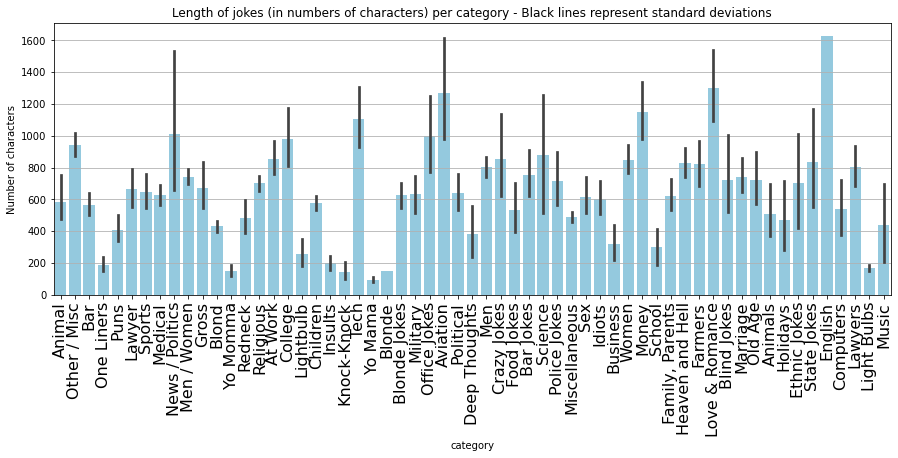

In [26]:
#compute length of each joke and add a column to the original dataframe
df['lengths'] = df['body'].apply(len).values

#plot
fig = plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='category', y='lengths', data=df, color='skyblue')
plt.xticks(fontsize=16, rotation=90)
plt.ylabel('Number of characters')
plt.title('Length of jokes (in numbers of characters) per category - Black lines represent standard deviations')

We see that One Liners, Yo Momma and Knock-Knock jokes are shorter than others, which is expected.

In [27]:
#Investigate is some lengths are weird
df[df['lengths']<5]

,id,body,category,lengths
159,169,,Other / Misc,0
765,904,,Gross,0
1266,1704,,Medical,0
1649,2394,,Men / Women,0
2316,3710,,Other / Misc,0
...,...,...,...,...
13782,3764,,Miscellaneous,0
13785,3767,,Miscellaneous,0
13786,3768,,Miscellaneous,0
13787,3769,,Miscellaneous,0


We see that there is some jokes that have no body text: we must remove them in the Data cleaning section

## Data Cleaning

In this part, we will clean the data. First, we will assign the jokes of the 'Blonde' category to the 'Blond' one, and same for 'Yo Mama'/'Yo Momma'

In [28]:
def merge_categories(df, category1, category2):
    '''
    Remove category1 from the original dataframe and add it as category2
    '''
    pd.options.mode.chained_assignment = None  # default='warn', to remove warnings due to the chain assignement
    
    #remove the category1 rows and add re-add the joke after nemaing the category as category2
    new_df = df[df['category']==category1].copy() #query the row with category1
    new_df['category'] = category2 #rename the category

    df = df.drop(new_df.index) #drop the original row
    df = pd.concat([df, new_df], ignore_index = True, axis = 0) #re-add it after renaming it
    return df

def clean_df(df):
    '''Clean the dataframe given as input
    Args:
        -df: dataframe to clean
    Returns:
        -df: cleaned dataframe
    '''
    #merge Blonde, Blond and Blonde jokes
    df = merge_categories(df, 'Blond', 'Blonde')
    df = merge_categories(df, 'Blonde Jokes', 'Blonde')
    
    #merge Bar jokes and Bar
    df = merge_categories(df, 'Bar Jokes', 'Bar')
    
    #merge Yo Momma and Yo Mama
    df = merge_categories(df, 'Yo Momma', 'Yo Mama')
    
    #merge Lighbulb and Lighbulbs
    df = merge_categories(df, 'Light Bulbs', 'Lightbulb')
    
    #merge Animal and Animals
    df = merge_categories(df, 'Animals', 'Animal')
    
    #merge At Work, Office Jokes and Business
    df = merge_categories(df, 'At Work', 'Business')
    df = merge_categories(df, 'Office Jokes', 'Business')
    
    #merge Men, Women and Men/Women
    df = merge_categories(df, 'Men', 'Men / Women')
    df = merge_categories(df, 'Women', 'Men / Women')
    
    #merge Lawyer and Lawyers
    df = merge_categories(df, 'Lawyer', 'Lawyers')
    
    #merge Tech and Computers
    df = merge_categories(df, 'Computers', 'Tech')
    
    #merge News / Political and Politics
    df = merge_categories(df, 'News / Politics', 'Political')
    
    #remove empty body texts
    df = df.drop(df[df['lengths']<5].index)
    
    return df

#observe the result of the cleaning function
print('Before cleaning:\nNumber of "Blonde" jokes :{}, number of "Blond" jokes: {}'.format(df[df['category'] == 'Blonde']['id'].count(),
                                                                                          df[df['category'] == 'Blond']['id'].count()))
print('Number of "Yo Mama" jokes :{}, number of "Yo Momma" jokes: {}'.format(df[df['category'] == 'Yo Mama']['id'].count(),
                                                                             df[df['category'] == 'Yo Momma']['id'].count()))
df_clean = clean_df(df)


print('After cleaning:\nNumber of "Blonde" jokes :{}, number of "Blond" jokes: {}'.format(df_clean[df_clean['category'] == 'Blonde']['id'].count(),
                                                                                          df_clean[df_clean['category'] == 'Blond']['id'].count()))
print('Number of "Yo Mama" jokes :{}, number of "Yo Momma" jokes: {}'.format(df_clean[df_clean['category'] == 'Yo Mama']['id'].count(),
                                                                             df_clean[df_clean['category'] == 'Yo Momma']['id'].count()))

print('\nRows that contains empty body jokes in the cleaned dataframe:')
df_clean[df_clean['lengths']<5]

Before cleaning:
Number of "Blonde" jokes :1, number of "Blond" jokes: 598
Number of "Yo Mama" jokes :144, number of "Yo Momma" jokes: 600
After cleaning:
Number of "Blonde" jokes :710, number of "Blond" jokes: 0
Number of "Yo Mama" jokes :744, number of "Yo Momma" jokes: 0

Rows that contains empty body jokes in the cleaned dataframe:


,id,body,category,lengths


Text(0.5, 1.0, 'Number of jokes per category')

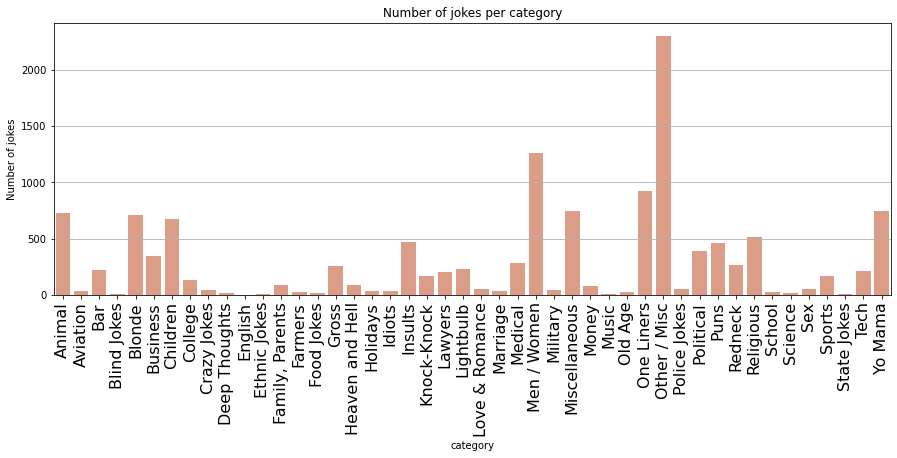

In [29]:
#number of jokes per category: final plot
count_per_category = df_clean.groupby('category').count().reset_index()

fig = plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='category', y='id', data=count_per_category, color='darksalmon')
plt.xticks(fontsize=16, rotation=90)
plt.ylabel('Number of jokes')
plt.title('Number of jokes per category')

In [32]:
#just select categories that have more than 100 jokes
nb_jokes_per_category = df_clean.groupby('category').count().reset_index()
cat_more_100 = nb_jokes_per_category[nb_jokes_per_category['id']>100]['category'].values

In [34]:
df_clean = df_clean[df_clean['category'].apply(lambda x: x in cat_more_100)]
df_clean.head(3)

,id,body,category,lengths
0,1,What do you call a cow with no legs?\r\n\r\nGr...,Animal,52
1,2,What do you call a cow jumping over a barbed w...,Animal,78
2,4,What's black and white and red all over?\r\n\r...,Other / Misc,56


Text(0.5, 1.0, 'Number of jokes per category')

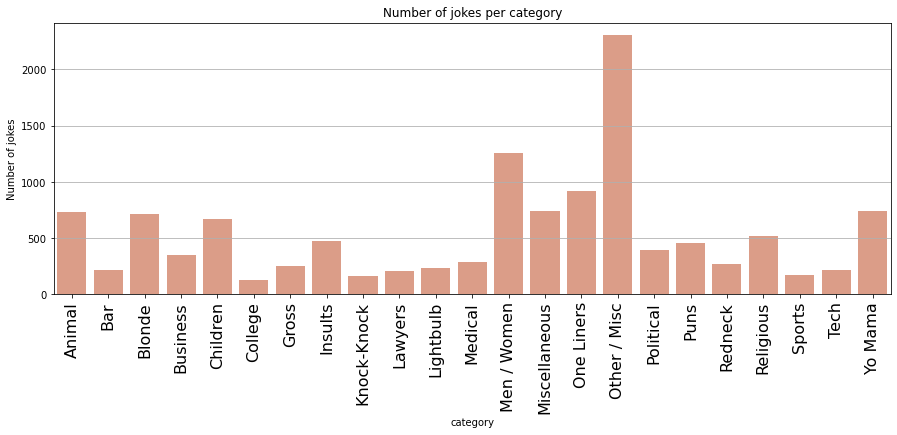

In [35]:
#number of jokes per category: final plot
count_per_category = df_clean.groupby('category').count().reset_index()

fig = plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='category', y='id', data=count_per_category, color='darksalmon')
plt.xticks(fontsize=16, rotation=90)
plt.ylabel('Number of jokes')
plt.title('Number of jokes per category')

We see that the number of jokes per category is very inconsistent (dataset unbalanced), this will make the model learn more about predominant categories. We will select a fixed number of jokes for all category such that the dataset is balanced

In [38]:
def select_nb(df, nb_jokes_per_category):
    """
    Select a fixed number of jokes for each category (with replacement: can re-use the same row)
    Args:
        -df: dataframe
        -nb_jokes_per_category
    Returns:
        -new_df: dataframe that contains nb_jokes_per_category jokes per category
    """
    new_df = pd.DataFrame()
    for category in df['category'].unique():
        df_filt = df[df['category'] == category].sample(nb_jokes_per_category, replace=True)
        new_df = pd.concat([new_df, df_filt], axis=0)
        
    #new_df = new_df.reset_index() #reset the index numbers
    return new_df

df = select_nb(df_clean, 300)
df.groupby('category').count().reset_index()

,category,id,body,lengths
0,Animal,300,300,300
1,Bar,300,300,300
2,Blonde,300,300,300
3,Business,300,300,300
4,Children,300,300,300
5,College,300,300,300
6,Gross,300,300,300
7,Insults,300,300,300
8,Knock-Knock,300,300,300
9,Lawyers,300,300,300


In [39]:
df.head(3)

,id,body,category,lengths
12554,3013,Markin' around The Christmas Tree\nWhat a dogg...,Animal,1022
5375,12808,Yo mama so fat when jumps up in the air she ge...,Animal,55
4948,11887,Laws of Feline Physics II\r\n\r\nLaw of Dinner...,Animal,1098


In [40]:
#save dataframe
df.to_csv('created_dataframes/df_balanced.csv', index=False)

## Data Exploration

In this section we will print a joke for each category, for curiosity.

In [68]:
between_2_jokes = 100*'_'

for category in df_clean['category'].unique():
    print('Category: {}\nJoke : {}\n{}'.format(category,
                                               df_clean[df_clean['category'] == category].sample()['body'].values[0], 
                                               between_2_jokes))

Category: Animal
Joke : How do you know if you have the swine flu? 

You wake up in pigtails and then break out in rashers!
____________________________________________________________________________________________________
Category: Other / Misc
Joke : Insurance Form Statements...

Coming home I drove into the wrong house and collided with a tree I don't have.

The other car collided with mine without giving warning of its intention.

I thought my window was down, but I found it was up when I put my head through it.

I collided with a stationary truck coming the other way.

A truck backed through my windshield into my wife's face.

The guy was all over the road. I had to swerve a number of times before I hit him.

I pulled away from the side of the road, glanced at my mother-in-law and headed over the embankment.

In an attempt to kill a fly I drove into a telephone pole.

I had been shopping for plants all day and was on my way home.

As I reached an intersection a hedge sprang up, 

We see that it can be difficult to classify a joke into a single category (if there are insults in a 'Puns' joke for example), we can take it into account during testing of the prediction model.

## Profanity score

The assignement requires us to give a score to the joke. I decided that this score would be a 'profanity score': How much the joke contains offensive words ?

To do this, we use a pre-trained model : https://victorzhou.com/blog/better-profanity-detection-with-scikit-learn/

In [14]:
from profanity_check import predict_prob


df['profanity_score'] = df['body'].apply(lambda x : predict_prob(x))

#plot
fig = plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(x='category', y='profanity_score', data=df, color='skyblue')
plt.xticks(fontsize=16, rotation=90)
plt.ylabel('Number of characters')
plt.title('Profanity score per category')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ModuleNotFoundError: No module named 'sklearn.svm.classes'

It seems there is some package differences, and I failed to solve the problem. 

Let's use another library: https://github.com/snguyenthanh/better_profanity

In [29]:
from better_profanity import profanity

ex = df[df['body'].apply(lambda x : 'fuck' in x)]
text = ex['body'].values[2]
censored_text = profanity.censor(text)

print(text,'\n---------------------------\n')
print(censored_text)
def proportion_profanity(censored_text):
    words = censored_text.split()
    print(words)

There was an foreign man who knew a little english and lived in a hotel. One day he told the waitress "I wanta fuck" the waitress said "what!!!" I wanta fuck, I wanta fuck on the table." The waitress answered and said "you better not you son of a bitch" so the waitress left mad and never gave him a fork. The next day he went to the manager and said "I wanta shit" the manager said "what!!!" "I wanta shit, I wanta shit on my bed" the manager answered "you  better not you son of a bitch" and he never got the sheet he wanted. 
---------------------------

There was an foreign man who knew a little english and lived in a hotel. One day he told the waitress "I wanta fuck" the waitress said "what!!!" I wanta ****, I wanta **** on the table." The waitress answered and said "you better not you son of a bitch" so the waitress left mad and never gave him a fork. The next day he went to the manager and said "I wanta shit" the manager said "what!!!" "I wanta ****, I wanta **** on my bed" the manage